In [56]:
%load_ext autoreload
%autoreload 

import sys
sys.path.insert(0, "..")

import logging
from dotenv import load_dotenv
%load_ext dotenv 
%dotenv /path/to/connectors.env

from test_collection.get_switchback_units import *
from test_collection.get_switchback_data import *
from test_collection.get_gen_pop import *
from econometrics.supporting_func import *
from test_collection.utils_check_config import *
from test_collection.get_switchback_splits import *
from test_collection.get_estimations import *
from test_collection.get_results import *
from test_collection.utils_dir import *
from test_collection.utils_upload_splits import upload_final_split
from test_collection.utils_splits import update_switchback_split, generate_nested_sw_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv
cannot find .env file


In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.StreamHandler()
    ]
)

#### Загрузка конфига

In [5]:
config_path = "/path/to/test_params.py"
test_params = read_test_params(path=config_path)

#### Проверка корректности заполнения конфига

In [6]:
check_switchback_config(test_params=test_params)

2023-05-23 08:22:15,927 [INFO] Test's config is correct


#### Создание директории 

In [7]:
create_directory(test_params)

2023-05-23 08:22:19,849 [INFO] Directory created


#### Загрузка файла генеральной совокупности и проверка его заполнения

In [9]:
gen_pop = get_gen_pop(test_params=test_params)
check_swithcback_gen_pop(gen_pop=gen_pop, test_params=test_params)

2023-05-23 08:22:40,426 [INFO] Датафрейм генеральной совокупности корректен


#### Создание возможных свитчбэк-юнитов

In [48]:
unit_range = get_switchback_population_range(test_params=test_params,
                                             unit_data=gen_pop)

2023-05-23 08:41:32,295 [INFO] Switchback units created


#### Загрузка и обработка данных

In [8]:
exp_metrics = get_switchback_data(test_params=test_params,
                                  gen_pop=gen_pop,
                                  unit_range=unit_range)

/home/previna/curr_master/notebooks/../test_collection/get_switchback_data.py:40: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  datetime = pd.datetime.now().strftime("%y-%m-%d %H-%m")
2023-01-25 15:13:57,478 [INFO] Collecting data from 2023-01-11 to 2023-01-24
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:20<00:00, 10.33s/it]
2023-01-25 15:14:18,150 [INFO] Data from experimental period collected
2023-01-25 15:14:18,151 [INFO] Stores id convertation began
/home/previna/curr_master/notebooks/../data/connectors.py:118: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return read_query(query, con=connection_class.session, *args, **kwargs)
100%|█████████████████████████████

#### Создание сплитов

In [23]:
splits = get_swithcback_splits(unit_range=unit_range,
                               test_params=test_params)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.62it/s]


#### АА тесты

2023-01-25 15:30:30,524 [INFO] Started simulations for order_cancellation_num
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:06<00:00,  6.06s/it]
/home/previna/curr_master/notebooks/../test_collection/get_estimations.py:261: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  datetime = pd.datetime.now().strftime("%y-%m-%d %H-%m")
2023-01-25 15:40:36,614 [INFO] Started simulations for gmv_H
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:02<00:00,  1.22s/it]
/home/previna/curr_master/notebooks/../test_collection/get_estimations.py:261: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  datetime = pd.datetime.now().strftime("%y-%m-%d %H-%m")
2023-01-25 15:42:39,652 [IN

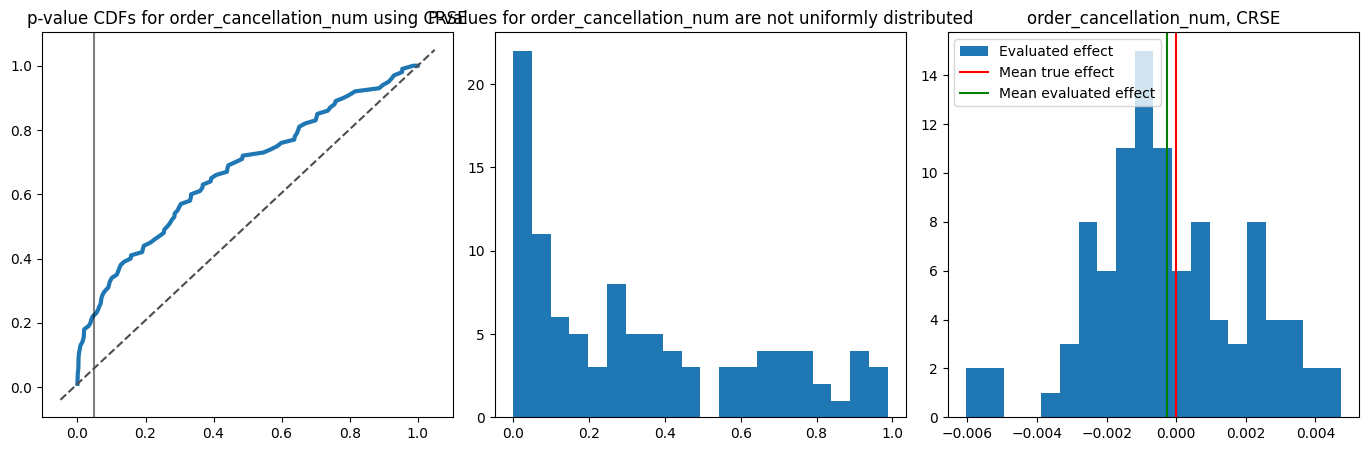

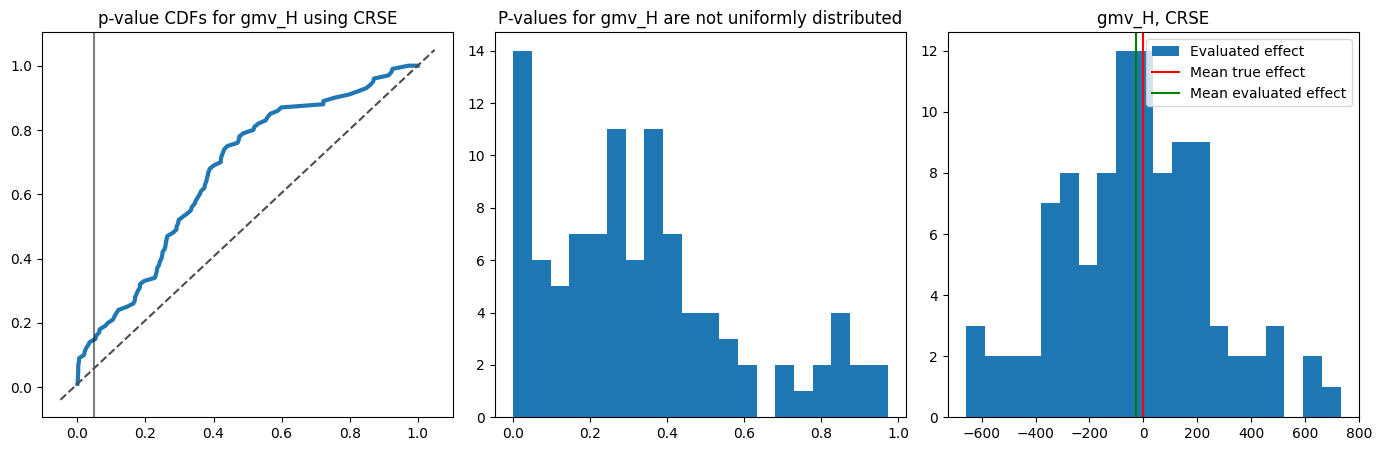

In [13]:
get_crse_results(exp_metrics=exp_metrics, 
                 strat_splits=splits,
                 test_params=test_params,
                 save=True)

#### Генерация синтетического эффекта

In [14]:
effect_distribution = generate_general_effect_distribution_sw(test_params=test_params,
                                                              exp_metrics=exp_metrics,
                                                              splits=splits,
                                                              switchback=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.70it/s]
2023-01-25 15:43:07,322 [INFO] Effect distribution saved to AB-1118/effect_distribution_AB-1118.md


#### Синтетические АБ тесты

2023-01-25 15:43:07,451 [INFO] Started simulations for order_cancellation_num
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [11:25<00:00,  6.85s/it]
/home/previna/curr_master/notebooks/../test_collection/get_estimations.py:261: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  datetime = pd.datetime.now().strftime("%y-%m-%d %H-%m")
2023-01-25 15:54:32,792 [INFO] Started simulations for gmv_H
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:14<00:00,  1.34s/it]
/home/previna/curr_master/notebooks/../test_collection/get_estimations.py:261: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  datetime = pd.datetime.now().strftime("%y-%m-%d %H-%m")
2023-01-25 15:56:47,797 [IN

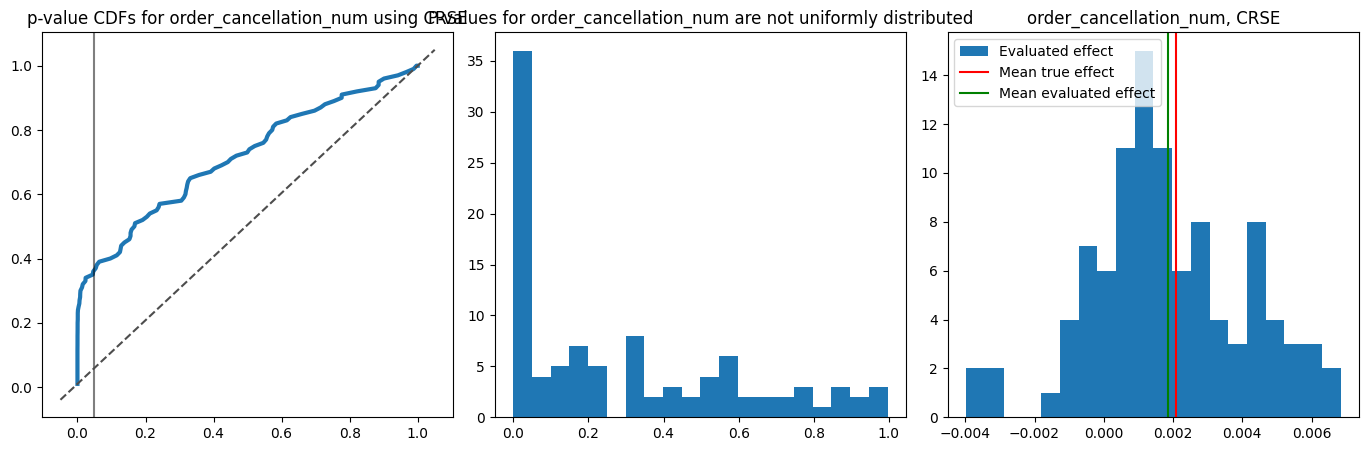

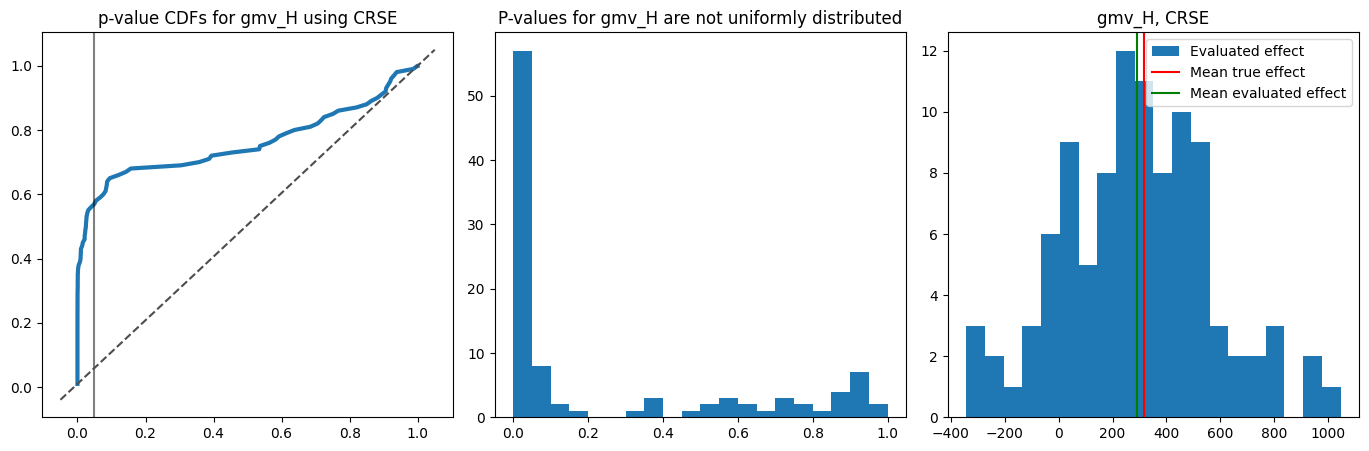

In [15]:
get_crse_results(exp_metrics=exp_metrics,
                 strat_splits=splits,
                 test_params=test_params,
                 synth=True, 
                 effect_distribution=effect_distribution,
                 save=True)

#### Опциональная оценка через MLM

In [22]:
if test_params['use_mlm']:
        get_mlm_results(exp_metrics=exp_metrics, 
                        strat_splits=splits,
                        test_params=test_params,
                        save=True)
        get_mlm_results(exp_metrics=exp_metrics,
                        strat_splits=splits,
                        test_params=test_params,
                        synth=True, 
                        effect_distribution=effect_distribution,
                        save=True)

#### Создание финального сплита

In [16]:
final_split = get_switchback_final_split(test_params=test_params,
                                             unit_data=gen_pop,
                                             splits=splits)

2023-05-23 08:30:18,839 [INFO] Switchback units created
2023-05-23 08:30:18,862 [INFO] Split saved to AB_switchback_test/split_AB_switchback_test.csv


In [17]:
final_split.head()

,start_exp_date,end_exp_date,time_cluster,start_end_hour,operational_zone_id,unit,strata,utc_offset,time_zone,treatment
0,2023-05-24 22:00:00,2023-05-25 22:00:00,0,22-22,45.0,0,0,10800,Europe/Moscow,group_1
1,2023-05-25 22:00:00,2023-05-26 22:00:00,1,22-22,45.0,1,0,10800,Europe/Moscow,group_1
2,2023-05-26 22:00:00,2023-05-27 22:00:00,2,22-22,45.0,2,0,10800,Europe/Moscow,group_0
3,2023-05-27 22:00:00,2023-05-28 22:00:00,3,22-22,45.0,3,0,10800,Europe/Moscow,group_0
4,2023-05-28 22:00:00,2023-05-29 22:00:00,4,22-22,45.0,4,0,10800,Europe/Moscow,group_0


#### Создание вложенного сплита 

При пересечении с другими тестами 

In [57]:
other_split = pd.read_csv("other_split.csv")
generate_nested_sw_split(test_params, 
                         unit_range, 
                         other_split)

2023-05-23 08:46:53,838 [INFO] Switchback units created
2023-05-23 08:46:55,683 [INFO] Nested split saved to AB_switchback_test/AB_switchback_test_split.csv


,start_exp_date,end_exp_date,time_cluster,start_end_hour,operational_zone_id,unit,strata,utc_offset,time_zone,other_unit,group
0,2023-05-24 22:00:00,2023-05-25 22:00:00,0,22-22,45.0,0,0,10800,Europe/Moscow,0.0,group_0
1,2023-05-25 22:00:00,2023-05-26 22:00:00,1,22-22,45.0,1,0,10800,Europe/Moscow,0.0,group_1
2,2023-05-26 22:00:00,2023-05-27 22:00:00,2,22-22,45.0,2,0,10800,Europe/Moscow,1.0,group_1
3,2023-05-27 22:00:00,2023-05-28 22:00:00,3,22-22,45.0,3,0,10800,Europe/Moscow,1.0,group_0
4,2023-05-28 22:00:00,2023-05-29 22:00:00,4,22-22,45.0,4,0,10800,Europe/Moscow,2.0,group_0
...,...,...,...,...,...,...,...,...,...,...,...
1675,2023-06-02 22:00:00,2023-06-03 22:00:00,9,22-22,100.0,1675,119,39600,Asia/Magadan,1005.0,group_0
1676,2023-06-03 22:00:00,2023-06-04 22:00:00,10,22-22,100.0,1676,119,39600,Asia/Magadan,1006.0,group_0
1677,2023-06-04 22:00:00,2023-06-05 22:00:00,11,22-22,100.0,1677,119,39600,Asia/Magadan,1006.0,group_1
1678,2023-06-05 22:00:00,2023-06-06 22:00:00,12,22-22,100.0,1678,119,39600,Asia/Magadan,1007.0,group_0


#### Загрузка итогового сплита

In [15]:
upload_final_split(final_split, test_params, switchback=True)

#### Обновление сплита актуальными датами по конфигу (при необходимости)

In [12]:
update_switchback_split(test_params)

#### Оценка теста

In [34]:
check_test_results_config(test_params)

2023-01-25 16:01:41,229 [INFO] Test's config is correct


In [15]:
results_df = evaluate_switchback_test_crse(test_params=test_params,
                                           gen_pop=gen_pop)